In [1]:
#Kütüphaneler çağırmak
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D,MaxPool2D,BatchNormalization

Using TensorFlow backend.


In [2]:
#Veri seti okumak
df=pd.read_csv("HCV_Egy.csv")

print(df.info())

#Define X & Y
y=df.Baselinehistological.values
x_data=df.drop(["Baselinehistological"],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              1385 non-null   int64
 1   Gender                           1385 non-null   int64
 2   BMI                              1385 non-null   int64
 3   Fever                            1385 non-null   int64
 4   Nausea/Vomting                   1385 non-null   int64
 5   Headache                         1385 non-null   int64
 6   Diarrhea                         1385 non-null   int64
 7   Fatigue & generalized bone ache  1385 non-null   int64
 8   Jaundice                         1385 non-null   int64
 9   Epigastric pain                  1385 non-null   int64
 10  HGB                              1385 non-null   int64
 11  AST 1                            1385 non-null   int64
 12  Baselinehistological             1385 non-null  

In [3]:
#Normalzasiyon
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

#Split test & train
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [4]:
#MLPC skor hesaplamak
mlpc=MLPClassifier(random_state=1)
mlpc.fit(x_train,y_train)
print("mlpc score:",mlpc.score(x_test,y_test)) 

mlpc score: 0.20216606498194944


C:\Users\saamm\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [5]:
#MLPC yi daha iyi sonuç almak için farklı parametreler denemek 
mlpc=MLPClassifier(random_state=1,solver="lbfgs",activation="identity",alpha=0.1,max_iter=2000,hidden_layer_sizes=(50,50,50))
mlpc.fit(x_train,y_train)
print("mlpc score:",mlpc.score(x_test,y_test))

mlpc score: 0.296028880866426


In [6]:
#modeli geliştirmek
# k_flod

#Veri seti okumak
df=pd.read_csv("HCV_Egy.csv")



#Define X & Y
y=df.Baselinehistological.values
x_data=df.drop(["Baselinehistological"],axis=1).values

#Normalzasiyon
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

scores=[]

kf=KFold(n_splits=10,random_state=1)
mlpc=MLPClassifier(solver="lbfgs",activation="identity",max_iter=2000,alpha=0.1)

for train_indexler,test_indexler in kf.split(x):
    mlpc.fit(x[train_indexler],y[train_indexler])
    score=mlpc.score(x[test_indexler],y[test_indexler])
    scores.append(score)
    print(score)
    
print("ortalama score:",np.mean(scores))

C:\Users\saamm\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.26618705035971224
0.2158273381294964
0.28776978417266186
0.2805755395683453
0.30935251798561153
0.2608695652173913
0.26811594202898553
0.2463768115942029
0.3333333333333333
0.21739130434782608
ortalama score: 0.2685799186737567


In [45]:
#Grid search

#Veri seti okumak
df=pd.read_csv("HCV_Egy.csv")

#Define X & Y
y=df.Baselinehistological.values
x_data=df.drop(["Baselinehistological"],axis=1)

#Normalzasiyon
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

#Split test & train
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)


#model oluşturma
mlpc_params={"alpha":[0.1,0.01,0.001,0.0001],
            "hidden_layer_sizes":[(10,10),(3,3,3),(100,100),(3,5,3),(50,50,50)],
            "solver":["lbfgs","adam","sgd"],
            "activation":["logistic","relu"]}

mlpc=MLPClassifier(random_state=1)

mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 10.5min finished


In [46]:
print(mlpc_cv_model.best_params_)

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'sgd'}


In [53]:
mlpc_tuned=MLPClassifier(random_state=1,activation="relu",alpha=0.01,hidden_layer_sizes=(50,50,50),solver="sgd",max_iter=2000).fit(x_train,y_train)
print("score:",mlpc_tuned.score(x_test,y_test))

score: 0.2815884476534296


In [54]:
# Modeli değerlendirmek

#Veri seti okumak
df=pd.read_csv("HCV_Egy.csv")

#Define X & Y
y=df.Baselinehistological.values
x_data=df.drop(["Baselinehistological"],axis=1)


#Normalzasiyon
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

#Split test & train
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1) 

mlpc=MLPClassifier(random_state=1,activation="relu",alpha=0.01,hidden_layer_sizes=(50,50,50),solver="sgd",max_iter=2000).fit(x_train,y_train)



In [59]:
#prediction the Y
y_pred=mlpc.predict(x_test)

#confusion_matrix hesaplama
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

acc=accuracy_score(y_test,y_pred)
print(acc)

#f1_score hesaplama
f1=metrics.f1_score(y_test,y_pred,average='micro')
print("f1 score:",f1)

[[ 1 24 14 32]
 [ 2 22 10 22]
 [ 1 26 22 33]
 [ 0 21 14 33]]
0.2815884476534296
f1 score: 0.2815884476534296


In [61]:
#Keras
#Veri seti okumak
df=pd.read_csv("HCV_Egy.csv")

#Define X & Y
y=df.Baselinehistological.values
x_data=df.drop(["Baselinehistological"],axis=1)


from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x_data,y,test_size=0.2,random_state=1)

In [67]:
#Keras modeli olusturma
model=Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='relu'))
model.add(BatchNormalization())

In [68]:
#modeli paketleme
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [71]:
egitim=model.fit(x_train,y_train,epochs=50,batch_size=20,validation_data=(x_test,y_test))

Train on 1108 samples, validate on 277 samples
Epoch 1/50
1108/1108 [==============================] - 0s 204us/step - loss: -6.4893 - accuracy: 0.1787 - val_loss: 1.6140 - val_accuracy: 0.1552
Epoch 2/50
1108/1108 [==============================] - 0s 191us/step - loss: -6.9880 - accuracy: 0.1769 - val_loss: -4.2777 - val_accuracy: 0.1913
Epoch 3/50
1108/1108 [==============================] - 0s 195us/step - loss: -7.2797 - accuracy: 0.1733 - val_loss: -12.5687 - val_accuracy: 0.1986
Epoch 4/50
1108/1108 [==============================] - 0s 192us/step - loss: -6.6835 - accuracy: 0.1823 - val_loss: -10.9326 - val_accuracy: 0.1949
Epoch 5/50
1108/1108 [==============================] - 0s 195us/step - loss: -7.0709 - accuracy: 0.1850 - val_loss: -9.3265 - val_accuracy: 0.1877
Epoch 6/50
1108/1108 [==============================] - 0s 204us/step - loss: -7.7035 - accuracy: 0.1859 - val_loss: -8.8422 - val_accuracy: 0.1697
Epoch 7/50
1108/1108 [==============================] - 0s 208us

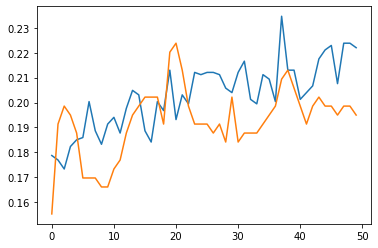

In [74]:
#bizim modelimizin accuracy eğrileri çizmek
plt.plot(egitim.history["accuracy"])
plt.plot(egitim.history["val_accuracy"])
plt.show()

In [75]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[ 0  0  0  0  0]
 [71  0  0  0  0]
 [56  0  0  0  0]
 [82  0  0  0  0]
 [68  0  0  0  0]]
